#   Walmart_CaseStudy


# About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


# Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv
User_ID: 	User ID
Product_ID: 	Product ID
Gender: 	Sex of User
Age: 	Age in bins
Occupation: 	Occupation(Masked)
City_Category: 	Category of the City (A,B,C)
StayInCurrentCityYears: 	Number of years stay in current city
Marital_Status: 	Marital Status
ProductCategory: 	Product Category (Masked)
Purchase: 	Purchase Amount

In [1]:
# Analysis
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df=pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Formatting the column in a more readable way

In [5]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [6]:
Marital_Status={
    0 : 'Unmarried',
    1 : 'Married'
}
df["Marital_Status"]=df["Marital_Status"].replace(Marital_Status)

In [7]:
df["Marital_Status"]

0         Unmarried
1         Unmarried
2         Unmarried
3         Unmarried
4         Unmarried
            ...    
550063      Married
550064    Unmarried
550065      Married
550066    Unmarried
550067      Married
Name: Marital_Status, Length: 550068, dtype: object

In [8]:
df["Marital_Status"].unique()

array(['Unmarried', 'Married'], dtype=object)

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


# There are still some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed.

In [10]:
df['Age']=(df['Age'].str.strip('+'))

In [69]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('int'))

# Dropping the columns that intuitiey should not imapact the purchase outcome, i.e. User_ID

In [12]:
df.drop(['User_ID'], axis=1, inplace=True)

In [101]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,P00285442,M,55,16,C,4,Unmarried,8,7969


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  int64 
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  int32 
 6   Marital_Status              550068 non-null  object
 7   Product_Category            550068 non-null  int64 
 8   Purchase                    550068 non-null  int64 
dtypes: int32(1), int64(3), object(5)
memory usage: 35.7+ MB


In [15]:
#number of unique values in our data
for i in df.columns:
    print(i,":", df[i].nunique())

Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [16]:
df.describe(include='all')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068,550068,550068,550068.000000,550068,550068,550068,550068.000000,550068.000000
unique,3631,2,7,NaN,3,5,2,NaN,NaN
top,P00265242,M,26-35,NaN,B,1,Unmarried,NaN,NaN
freq,1880,414259,219587,NaN,231173,193821,324731,NaN,NaN
mean,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


In [17]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Observations

1.There are no missing values in data.
2.There are 3 unique city categories in data.
3.More Males purchased according to data i.e(414259 out of 550068).
4.Unmarried people showed interest buying in Black Friday according to data i.e (324731 out of 550068).
5.More items were brought in B type city according to data. 

In [19]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<AxesSubplot:>

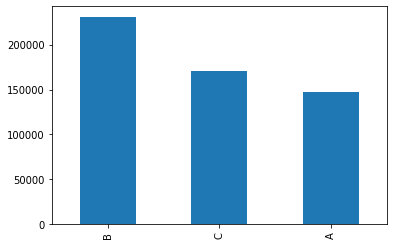

In [23]:
df['City_Category'].value_counts().plot(kind='bar')

# Univariate Analysis

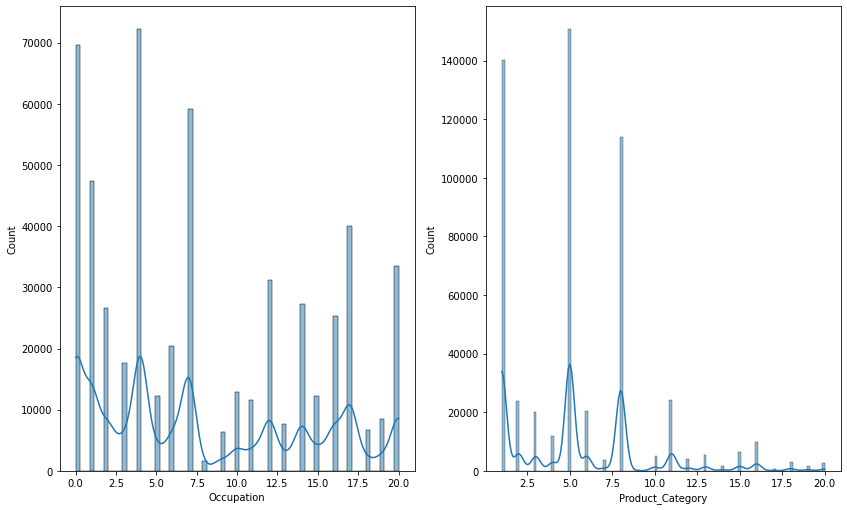

In [32]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Occupation", kde=True, ax=axis[0])
sns.histplot(data=df, x="Product_Category", kde=True, ax=axis[1])

plt.show()

# Understanding the distribution of the data for the Categorical attributes:

[Text(0.5, 1.0, 'Gender - counts')]

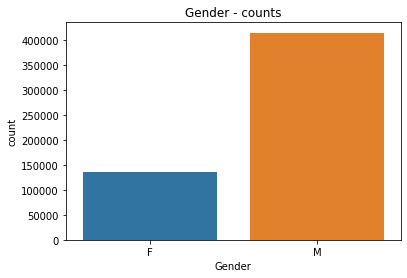

In [39]:
sns.countplot(data=df, x='Gender').set(title='Gender - counts')

[Text(0.5, 1.0, 'Age - counts')]

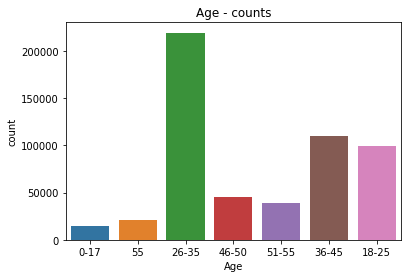

In [40]:
sns.countplot(data=df, x='Age').set(title='Age - counts')

[Text(0.5, 1.0, 'City_Category - counts')]

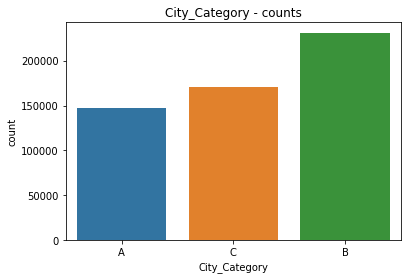

In [35]:
sns.countplot(data=df, x='City_Category').set(title='City_Category - counts')

[Text(0.5, 1.0, 'Stay_In_Current_City_Years - counts')]

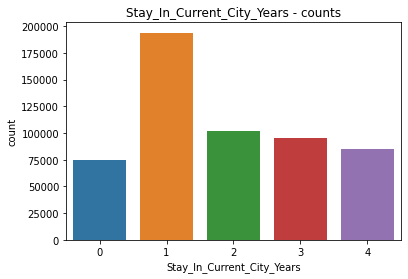

In [71]:
sns.countplot(data=df, x='Stay_In_Current_City_Years').set(title='Stay_In_Current_City_Years - counts')

[Text(0.5, 1.0, 'Marital_Status - counts')]

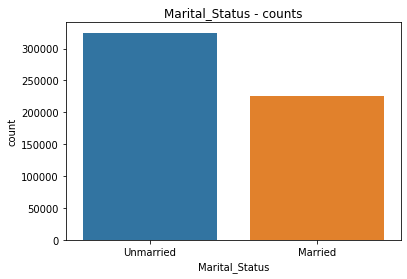

In [37]:
sns.countplot(data=df, x='Marital_Status').set(title='Marital_Status - counts')

# Obervations:

1.More Males attended Black friday Sale.
2.More people of Age of range 26-35 attending the sale.
3.More sales are happened in B Category City.
4.More peole who stayed for 1 year in current year purchased more during sale.
5.Unmarried people attended the sale and purchased more.

<AxesSubplot:xlabel='Occupation'>

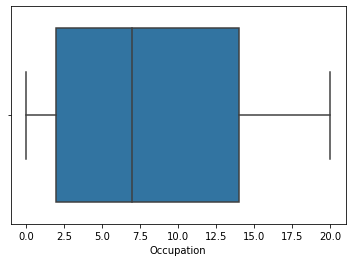

In [43]:
sns.boxplot(data=df, x="Occupation")

<AxesSubplot:xlabel='Product_Category'>

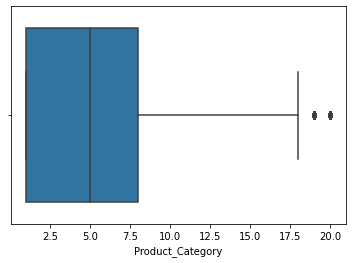

In [44]:
sns.boxplot(data=df, x="Product_Category")

# Observations

1.No Outliers present in Occupation
2.Few Outliers present in Product Category but can't remove these outliers because it tells about the product brought by customer.

# Bivariate Analysis

[Text(0.5, 1.0, 'Age vs Gender')]

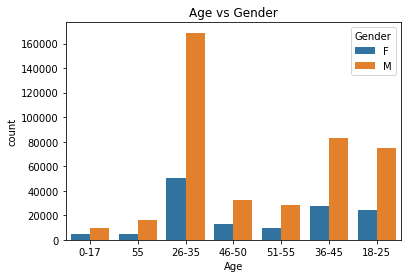

In [46]:
sns.countplot(data=df, x='Age', hue='Gender').set(title='Age vs Gender')

[Text(0.5, 1.0, 'Age vs MaritalStatus')]

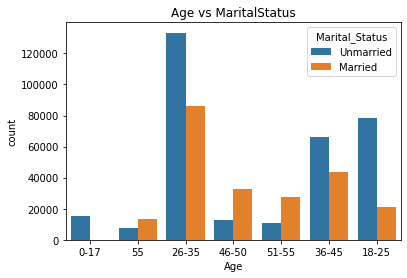

In [48]:
sns.countplot(data=df, x='Age', hue='Marital_Status').set(title='Age vs MaritalStatus')

[Text(0.5, 1.0, 'Marital_Status vs Gender')]

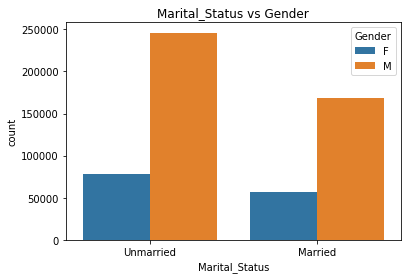

In [56]:
sns.countplot(data=df, x='Marital_Status', hue='Gender').set(title='Marital_Status vs Gender')

[Text(0.5, 1.0, 'City_Category vs MaritalStatus')]

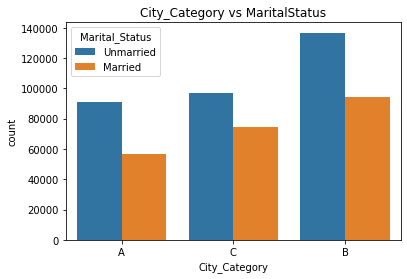

In [50]:
sns.countplot(data=df, x='City_Category', hue='Marital_Status').set(title='City_Category vs MaritalStatus')

[Text(0.5, 1.0, 'City_Category vs Gender')]

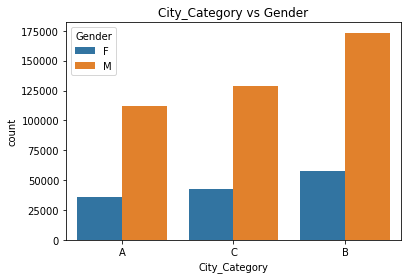

In [51]:
sns.countplot(data=df, x='City_Category', hue='Gender').set(title='City_Category vs Gender')

[Text(0.5, 1.0, 'Stay_In_Current_City_Years vs Gender')]

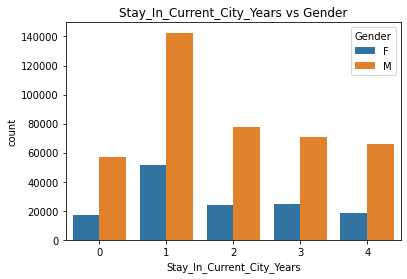

In [72]:
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Gender').set(title='Stay_In_Current_City_Years vs Gender')

[Text(0.5, 1.0, 'Stay_In_Current_City_Years vs Age')]

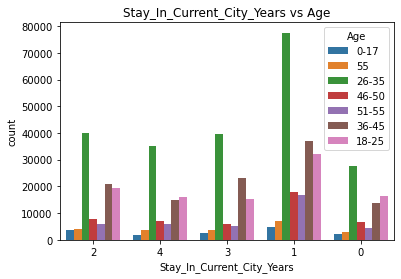

In [54]:
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Age').set(title='Stay_In_Current_City_Years vs Age')

[Text(0.5, 1.0, 'Stay_In_Current_City_Years vs City_Category')]

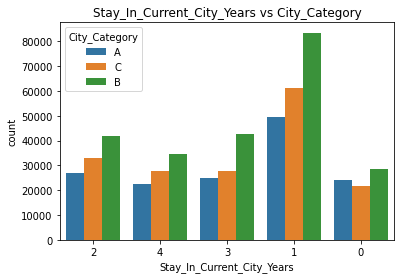

In [55]:
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='City_Category').set(title='Stay_In_Current_City_Years vs City_Category')

# Observations

1.Age vs Gender
	More Males of age 26-35 attended the sale 
2.Age vs MaritalStatus
	More Unmarried of age 26-35 attended the sale.
3.Marital_Status vs Gender
	More Unmarried Males attended the sale.
4.City_Category vs MaritalStatus
	More Unmarried people attended in all cities for sale.
5.City_Category vs Gender
	More Males attended in all cities for sale.
6.Stay_In_Current_City_Years vs Gender
	More males who lived for i year in current city attended the sale.
7.Stay_In_Current_City_Years vs Age
	More people of age 26-35 and lived for 1 year in that city attended the sale.
8.Stay_In_Current_City_Years vs City_Category
	More people who stayed for 1 year in that city attended the sale 
	More sales are happedned in City B 

[Text(0.5, 1.0, 'Gender vs Purchase')]

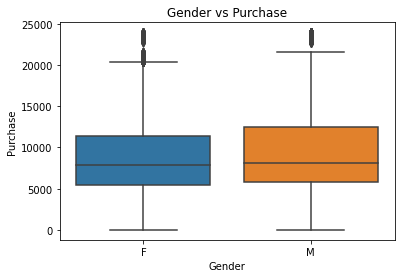

In [57]:
sns.boxplot(data=df,x='Gender',y='Purchase').set(title='Gender vs Purchase')

# Observations

-->Gender vs Purchase

1.Many Males made more purchaces
2.mean of male purchase value is more than female purchase value.

[Text(0.5, 1.0, 'Age vs Purchase')]

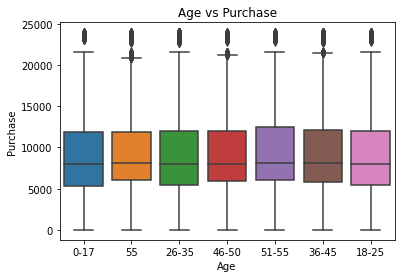

In [58]:
sns.boxplot(data=df,x='Age',y='Purchase').set(title='Age vs Purchase')

# Observations

-->Age vs Purchase

1.Customer with age of 51-55 has more purchase value i.e(more costely items).
2.mean value of all age groups are almost equal with some Variance.

[Text(0.5, 1.0, 'City_Category vs Purchase')]

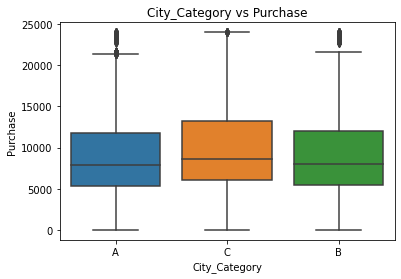

In [59]:
sns.boxplot(data=df,x='City_Category',y='Purchase').set(title='City_Category vs Purchase')

# Observations

-->City_Category vs Purchase

1.For City type C has more mean for purchase value.
2.But For City B and City A has many Outliers means few customers purchsed more that average purchase for that city.

[Text(0.5, 1.0, 'Stay_In_Current_City_Years vs Purchase')]

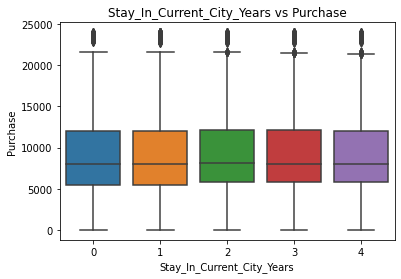

In [73]:
sns.boxplot(data=df,x='Stay_In_Current_City_Years',y='Purchase').set(title='Stay_In_Current_City_Years vs Purchase')

# Observations

-->Stay_In_Current_City_Years vs Purchase

1.Mean values for all stay type has been same.

[Text(0.5, 1.0, 'MaritalStatus vs Purchase')]

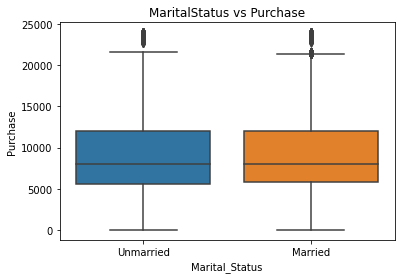

In [61]:
sns.boxplot(data=df,x='Marital_Status',y='Purchase').set(title='MaritalStatus vs Purchase')

# Observations

-->MaritalStatus vs Purchase

1.Mean values for both married and unmarried has been same.

# Multivariate Analysis

In [74]:
## correlation matrix for heat map
df.corr()

,Occupation,Stay_In_Current_City_Years,Product_Category,Purchase
Occupation,1.000000,0.030005,-0.007618,0.020833
Stay_In_Current_City_Years,0.030005,1.000000,-0.004213,0.005422
Product_Category,-0.007618,-0.004213,1.000000,-0.343703
Purchase,0.020833,0.005422,-0.343703,1.000000


<AxesSubplot:>

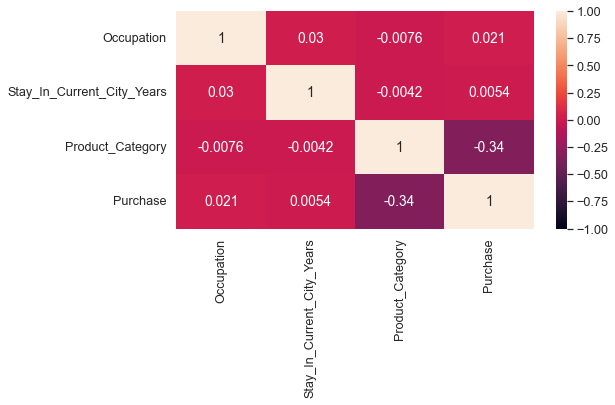

In [77]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr(),         
    annot=True, 
    vmin=-1, vmax=1)

# Observations

1.The key take aways from the above plot are the positive correlation coefficients of three features as a function of Purchase:
    A)Occupation
    B)Stay_In_Current_City_Years
2.Increase in any of the values for the above Two features is likey to result in a higher purchase from the customer.

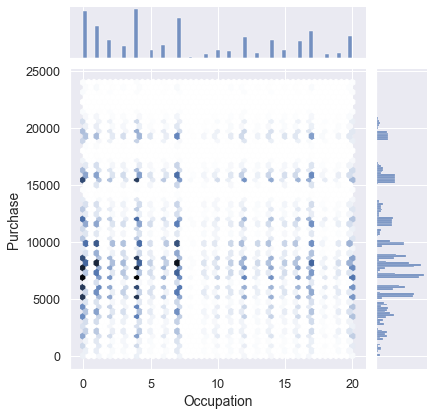

In [82]:
sns.jointplot(x='Occupation',y='Purchase',data=df, kind='hex')

# Observations

1.First insight would be that most of the purchase is done between 5000-10000.
2.Next important insight, would be the occupations that lead to highest purchases. In this case, it would be occupation 4,   listed in the dataset, closely followed that by 0 and 7.
3.One can imagine that the store can run targeted advertiements next time around to people with above listed occupations as   they more likely to spend within the above purchase range.

C:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


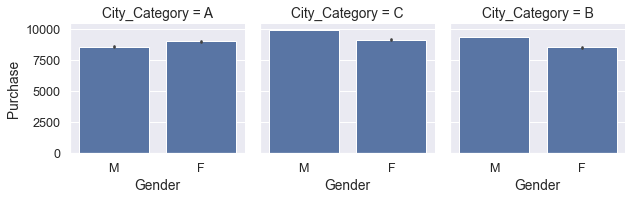

In [83]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

C:\Users\Harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '46-50'),
  Text(1, 0, '36-45'),
  Text(2, 0, '18-25'),
  Text(3, 0, '26-35'),
  Text(4, 0, '51-55'),
  Text(5, 0, '0-17'),
  Text(6, 0, '55')])

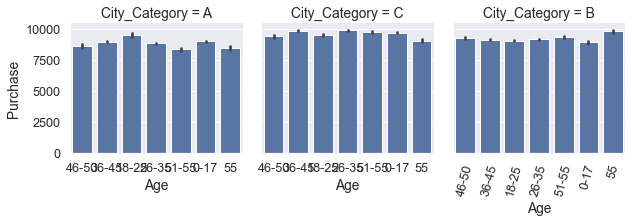

In [202]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Age", "Purchase");
plt.xticks(rotation = 75)

# Observations


1.Clearly people from City_Category C are showing higher purchase capacity as compared to the other two cities on average.
2.For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where   Females tend to puchase more than men. It is a useful insight, and it be useful to oserve which age group of females does   higher purchasing.
3.Mean of purchase capacity in the age of 18-25 is sligthly more than others.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

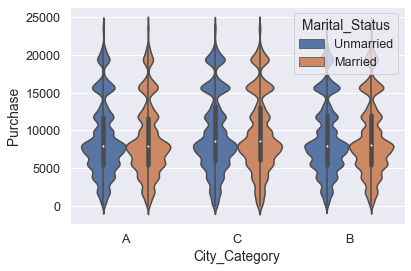

In [93]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',data=df)

# Observations

1.Ananlysis of Purchase capacity as a function of Marital Status across city categories does not show a definitive trend. It would lead to a lot of assumptions and might lead to wrong conlcusions.

# Analysis on how marital status plays a role on different features of the data.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '(Married, 18-25)'),
  Text(1, 0, '(Married, 26-35)'),
  Text(2, 0, '(Married, 36-45)'),
  Text(3, 0, '(Married, 46-50)'),
  Text(4, 0, '(Married, 51-55)'),
  Text(5, 0, '(Married, 55)'),
  Text(6, 0, '(Unmarried, 0-17)'),
  Text(7, 0, '(Unmarried, 18-25)'),
  Text(8, 0, '(Unmarried, 26-35)'),
  Text(9, 0, '(Unmarried, 36-45)'),
  Text(10, 0, '(Unmarried, 46-50)'),
  Text(11, 0, '(Unmarried, 51-55)'),
  Text(12, 0, '(Unmarried, 55)')])

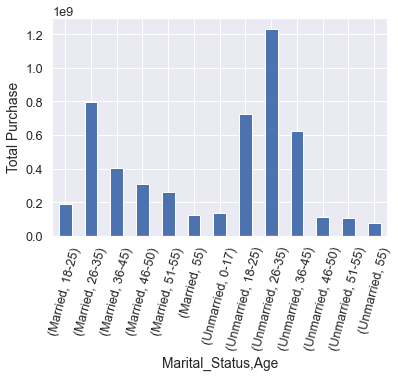

In [95]:
df.groupby(['Marital_Status','Age'])['Purchase'].sum().plot(kind = 'bar')
plt.ylabel('Total Purchase')
plt.xticks(rotation = 75)

# Observations 

1.Most purchase done is from the age group of 26-35 and unmarried , wherease least is done from unmarried with 55+ age.

In [96]:
df.groupby(['Marital_Status','Occupation'])['Purchase'].sum().unstack(level='Marital_Status')

Marital_Status,Married,Unmarried
Occupation,,
0,264581586,370825372
1,203018890,221595254
2,107312813,130715770
3,66013173,95988995
4,178648926,487595558
5,42196262,71453497
6,84610103,103806681
7,244044394,313327193
8,8379933,6357455


In [97]:
df.groupby(['Marital_Status','City_Category','Gender'])['Purchase'].count().unstack(level = 'City_Category')

City_Category              A       B      C
Marital_Status Gender                      
Married        F       13877   23269  19842
               M       42670   71183  54496
Unmarried      F       21827   34527  22467
               M       69346  102194  74370

In [100]:
df.groupby(['Marital_Status','Stay_In_Current_City_Years',
            'City_Category','Gender'])['Purchase'].count().unstack(level ='Stay_In_Current_City_Years')

Stay_In_Current_City_Years               0      1      2      3      4
Marital_Status City_Category Gender                                   
Married        A             F        2242   5095   1905   2842   1793
                             M        7213  15594   7042   5698   7123
               B             F        3416   9019   3902   4245   2687
                             M        7672  25658  13310  13068  11475
               C             F        2215   7966   3954   3251   2456
                             M        6732  19793  10925   8534   8512
Unmarried      A             F        2790   7045   4957   4621   2414
                             M       11933  21571  13210  11643  10989
               B             F        3824  13477   5331   6593   5302
                             M       13775  35259  19229  18785  15146
               C             F        2576   8696   4283   2968   3944
                             M       10010  24648  13790  13037  12885

# Observations:

1.Here occupations 8,9 and 13 has more purchase in married category than unmarried.
2.Male and female from both married and unmarried status if they belongs to city category B then they would spend more.
3.If someone belongs to unmarried,married category and if stays in current city for 1 year then chances of purchase is more   as compared to other categories

# Confidence Interval and CLT

In [ ]:
# Confidence Interval for purchase

In [121]:
mean=df['Purchase'].mean()
mean

9263.968712959126

In [122]:
std=df['Purchase'].std()
std

5023.065393820582

In [123]:
n=len(df['Purchase'])
n

550068

 # The Z-multiplier for 68%, 95%, and 99% is 1, 1.96, and 2.57 respectively.

In [124]:
res = [[np.round(mean -(i*(std / np.sqrt(n))),2), np.round(mean +(i*(std / np.sqrt(n))),2)] for i in [1, 1.96, 2.57]]
res

[[9257.2, 9270.74], [9250.69, 9277.24], [9246.56, 9281.37]]

# Observations

1.68% Confidence Interval for Given Data lies in [9257.2, 9270.74].
2.95% Confidence Interval for Given Data lies in [9250.69, 9277.24].
3.99% Confidence Interval for Given Data lies in [9246.56, 9281.37].

In [ ]:
# CLT on Purchase done by Gender specific Categorization

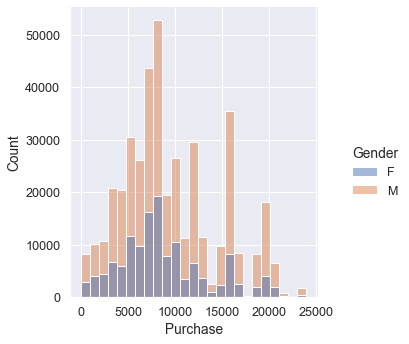

In [103]:
sns.displot(data = df, x = 'Purchase', hue = 'Gender',bins = 25)
plt.show()

# Observations : 
    
1.We can clearly see that, no. of females purchasing from Black Friday Saless are comaparitively low in count than no. of males.
2.Females are spending low amount compared to Males

In [104]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [105]:
df.sample(300).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,89.0,8987.550562,5347.610552,48.0,5417.0,7976.0,12886.0,20001.0
M,211.0,9180.691943,4986.272801,128.0,5447.0,7907.0,11749.0,23269.0


In [112]:
df_sample1 = df[df['Gender'] == 'M']
df_sample_purchase_M = df_sample1['Purchase']
len(df_sample_purchase_M)

414259

In [113]:
df_sample2 = df[df['Gender'] == 'F']
df_sample_purchase_F = df_sample2['Purchase']
len(df_sample_purchase_F)

135809

<AxesSubplot:ylabel='Frequency'>

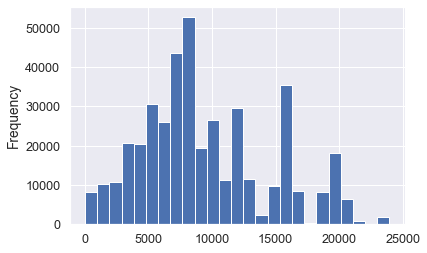

In [114]:
df_sample_purchase_M.plot(kind='hist',bins=25)

# Observations:

1.As we can see, the above plot is not normal distribution and if we assume it to be normal and do all calculations based on it, it might lead us to wrong conclusion and hence applying CLT to get the sampling distribution of sample means to get a Normal Distribution out of it.

In [132]:
mean=df_sample_purchase.mean()
mean

8734.565765155476

In [118]:
std=df_sample_purchase.std()
std

4767.233289291458

In [119]:
n=len(df_sample_purchase)
n

135809

<AxesSubplot:ylabel='Density'>

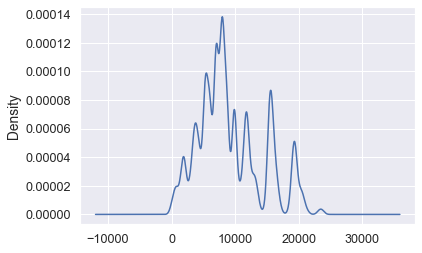

In [128]:
df['Purchase'].plot(kind='kde')

In [125]:
def simulate_clt(d, sample_size=20, trials=200):
    means = []
    for i in range(trials):
        means.append(d.sample(sample_size).mean())
    pd.Series(means).plot(kind='kde')
    return pd.Series(means)

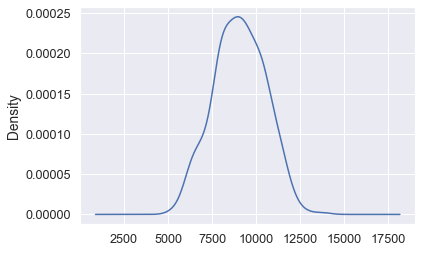

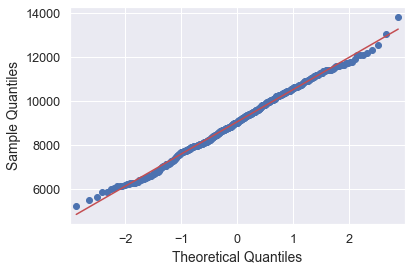

In [129]:
x = simulate_clt(df['Purchase'], sample_size=10, trials=500)
sm.qqplot(x, dist=stats.norm, line='s');

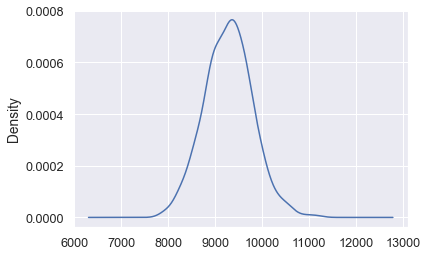

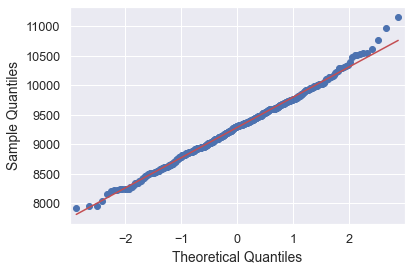

In [131]:
x = simulate_clt(df['Purchase'], sample_size=100, trials=500)
sm.qqplot(x, dist=stats.norm, line='s');

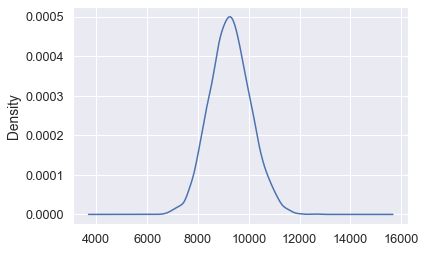

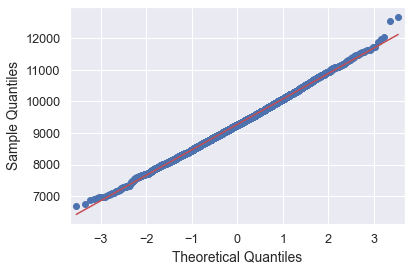

In [130]:
x = simulate_clt(df['Purchase'], sample_size=40, trials=5000)
sm.qqplot(x, dist=stats.norm, line='s');

In [ ]:
#Observations:

1.Distribution for purchase is not normal.
2.But Distributions of samples from population is tending to normal if we increase sample size
3.By increasing sample size Standard Deviation is decreasing.
4.standard Deviation of a curve can be demonstrated as spread of the curve at mean or median.

In [133]:
df_sample1 = df[df['Gender'] == 'M']
df_sample_purchase_M = df_sample1['Purchase']
len(df_sample_purchase_M)

414259

In [134]:
df_sample2 = df[df['Gender'] == 'F']
df_sample_purchase_F = df_sample2['Purchase']
len(df_sample_purchase_F)

135809

# Confidence intervals and distribution of the mean of the expenses by female and male customers

In [136]:
mean_M=df_sample_purchase_M.mean()
mean_M

9437.526040472265

In [137]:
std_M=df_sample_purchase_M.std()
std_M

5092.18620977797

In [139]:
n_M=len(df_sample_purchase_M)
n_M

414259

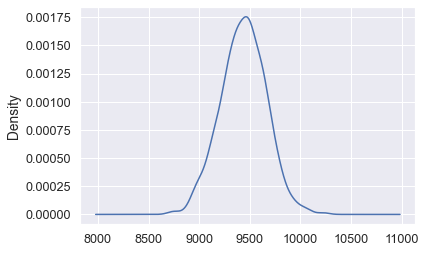

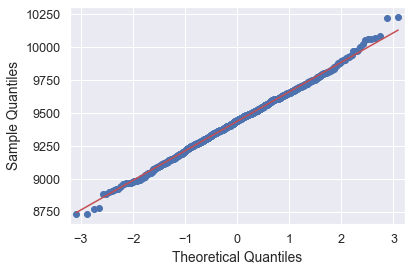

In [162]:
x = simulate_clt(df_sample_purchase_M, sample_size=500, trials=1000)
sm.qqplot(x, dist=stats.norm, line='s');

In [140]:
res_M = [[np.round(mean_M -(i*(std_M / np.sqrt(n_M))),2), np.round(mean_M +(i*(std_M / np.sqrt(n_M))),2)] for i in [1, 1.96, 2.57]]
res_M

[[9429.61, 9445.44], [9422.02, 9453.03], [9417.19, 9457.86]]

# Observations for Male Customer Expenses

1.68% Confidence Interval for the expenses by Male customersa lies in [9429.61, 9445.44].
2.95% Confidence Interval for the expenses by Male customersa lies in [9422.02, 9453.03].
3.99% Confidence Interval for the expenses by Male customersa lies in [9417.19, 9457.86].

In [141]:
mean_F=df_sample_purchase_F.mean()
mean_F

8734.565765155476

In [157]:
std_F=df_sample_purchase_F.std()
std_F

4767.215738017004

In [143]:
n_F=len(df_sample_purchase_F)
n_F

135809

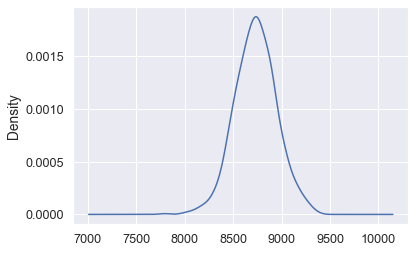

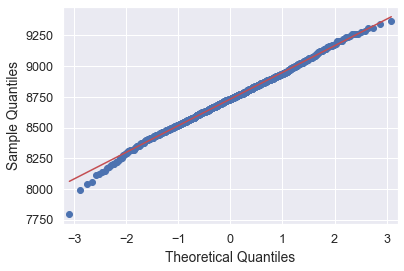

In [163]:
x = simulate_clt(df_sample_purchase_F, sample_size=500, trials=1000)
sm.qqplot(x, dist=stats.norm, line='s');

In [144]:
res_F = [[np.round(mean_F -(i*(std_F / np.sqrt(n_F))),2), np.round(mean_F +(i*(std_F / np.sqrt(n_F))),2)] for i in [1, 1.96, 2.57]]
res_F

[[8721.63, 8747.5], [8709.21, 8759.92], [8701.32, 8767.81]]

# Observations for Female Customer Expenses

1.68% Confidence Interval for the expenses by Female customersa lies in [8721.63, 8747.5].
2.95% Confidence Interval for the expenses by Female customersa lies in [8709.21, 8759.92].
3.99% Confidence Interval for the expenses by Female customersa lies in [8701.32, 8767.81].

In [145]:
def simulate_clt(d, sample_size=20, trials=200):
    means = []
    for i in range(trials):
        means.append(d.sample(sample_size).mean())
    pd.Series(means).plot(kind='kde')
    return pd.Series(means)

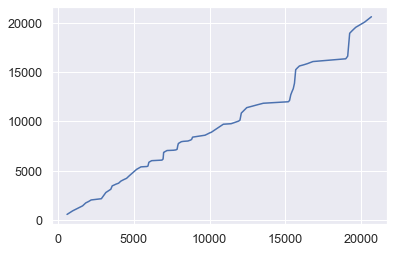

In [147]:
x, y = [], []
for q in range(1, 100):
    x.append(df_sample_purchase_M.quantile(q/100))
    y.append(df_sample_purchase_F.quantile(q/100))
x = np.array(x)
y = np.array(y)

plt.plot(x, y)

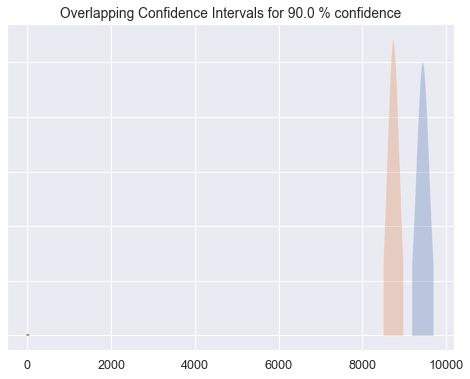

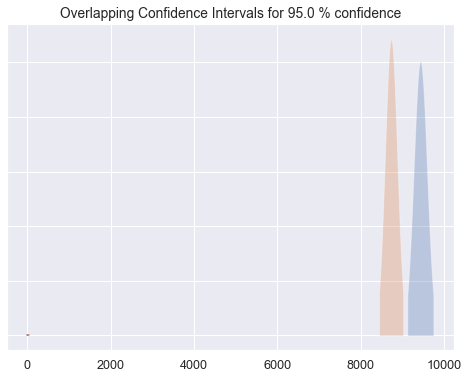

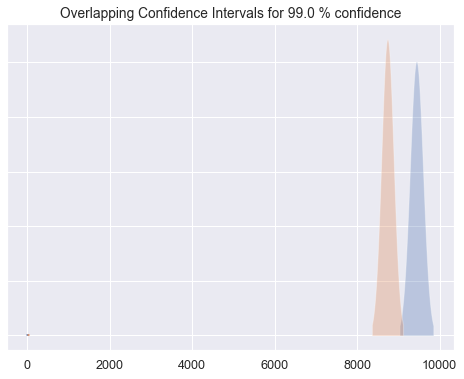

In [158]:
mu_male = 9437
mu_female = 8734
sd_male = 159
sd_female = 147

for i in [0.9, 0.95, 0.99]:
    
    ci1 = stats.norm.interval(i, loc=mu_male, scale=sd_male)
    ci2 = stats.norm.interval(i, loc=mu_female, scale=sd_female)

    def returnNormalY(x, mu, sd):
        return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

    # Generate Data for Plot
    # Fill Section
    x1 = np.linspace(ci1[0], ci1[1], 1000)
    y1 = returnNormalY(x1, mu_male, sd_male)
    x2 = np.linspace(ci2[0], ci2[1], 1000)
    y2 = returnNormalY(x2, mu_female, sd_female)
    # Line Section
    x1_line = np.linspace(0, 17)
    y1_line = returnNormalY(x1_line, mu_male, sd_male)
    x2_line = np.linspace(9, 25)
    y2_line = returnNormalY(x2_line, mu_female, sd_female)

    # Generate Plot
    fig, ax = plt.subplots()
    ax.plot(x1_line, y1_line)
    ax.plot(x2_line, y2_line)
    ax.fill_between(x1, y1, alpha=0.3)
    ax.fill_between(x2, y2, alpha=0.3)

    # Plot Editing
    fig.set_size_inches(8, 6, forward=False)
    ax.set_yticklabels([])
    plt.title(f"Overlapping Confidence Intervals for {i *100} % confidence")
    plt.show()

# Observations

1.No OverLapping of Confidence Intervals is seen.
2.As the confidence percentage inreases, the spread i.e the difference between the upper limit and lower limit also increases. 
3.Also, we can conclude that, mean purchase done by men is higher than females as we hardly see any overlap, the Black Friday Sales management should focus more on individual category and should cater to specific needs for boths categories differently.

# Confidence intervals and distribution of the mean of the expenses by Unmarried and Married customers

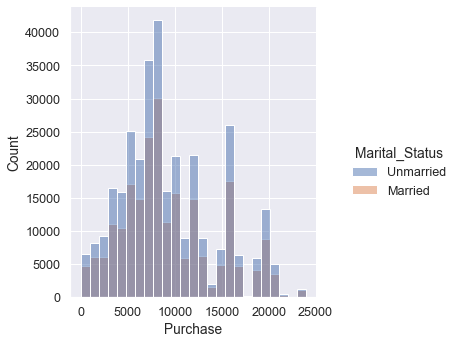

In [164]:
sns.displot(data = df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

# Observations

1.Unmarried Customers had spent more money than married customers.

In [177]:
df_sample_M = df[df['Marital_Status'] == 'Married']
df_sample_purchase_Married = df_sample_M['Purchase']
len(df_sample_purchase_Married)

225337

In [178]:
df_sample_U = df[df['Marital_Status'] == 'Unmarried']
df_sample_purchase_Unmarried = df_sample_U['Purchase']
len(df_sample_purchase_Unmarried)

324731

In [179]:
mean_Married=df_sample_purchase_Married.mean()
mean_Married

9261.174574082374

In [180]:
std_Married=df_sample_purchase_Married.std()
std_Married

5016.897377793055

In [182]:
n_Married=len(df_sample_purchase_Married)
n_Married

225337

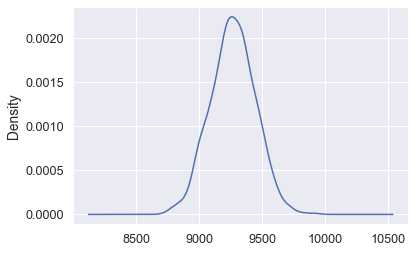

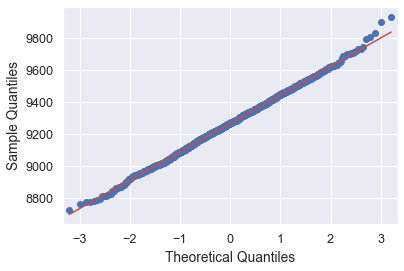

In [184]:
x = simulate_clt(df_sample_purchase_Married, sample_size=800, trials=1500)
sm.qqplot(x, dist=stats.norm, line='s');

In [186]:
res_Married = [[np.round(mean_Married -(i*(std_Married / np.sqrt(n_Married))),2), 
                np.round(mean_Married +(i*(std_Married / np.sqrt(n_Married))),2)] for i in [1, 1.96, 2.57]]
res_Married

[[9250.61, 9271.74], [9240.46, 9281.89], [9234.01, 9288.34]]

# Observations for Married Customer Expenses

1.68% Confidence Interval for the expenses by Married customersa lies in [9250.61, 9271.74].
2.95% Confidence Interval for the expenses by Married customersa lies in [9240.46, 9281.89].
3.99% Confidence Interval for the expenses by Married customersa lies in [9234.01, 9288.34].

In [187]:
mean_Unmarried=df_sample_purchase_Unmarried.mean()
mean_Unmarried

9265.907618921507

In [188]:
std_Unmarried=df_sample_purchase_Unmarried.std()
std_Unmarried

5027.347858674449

In [190]:
n_Unmarried=len(df_sample_purchase_Unmarried)
n_Unmarried

324731

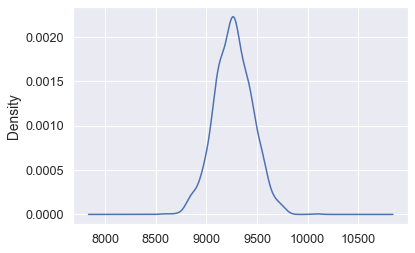

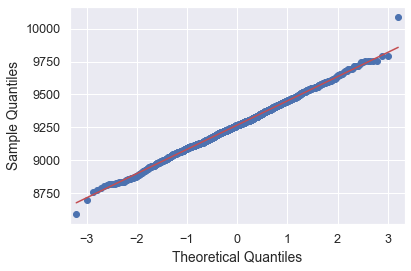

In [191]:
x = simulate_clt(df_sample_purchase_Unmarried, sample_size=800, trials=1500)
sm.qqplot(x, dist=stats.norm, line='s');

In [192]:
res_Unmarried = [[np.round(mean_Unmarried -(i*(std_Unmarried / np.sqrt(n_Unmarried))),2), 
                np.round(mean_Unmarried +(i*(std_Unmarried / np.sqrt(n_Unmarried))),2)] for i in [1, 1.96, 2.57]]
res_Unmarried

[[9257.09, 9274.73], [9248.62, 9283.2], [9243.23, 9288.58]]

# Observations for Unmarried Customer Expenses

1.68% Confidence Interval for the expenses by Unmarried customersa lies in [9257.09, 9274.73].
2.95% Confidence Interval for the expenses by Unmarried customersa lies in [9248.62, 9283.2].
3.99% Confidence Interval for the expenses by Unmarried customersa lies in [9243.23, 9288.58].

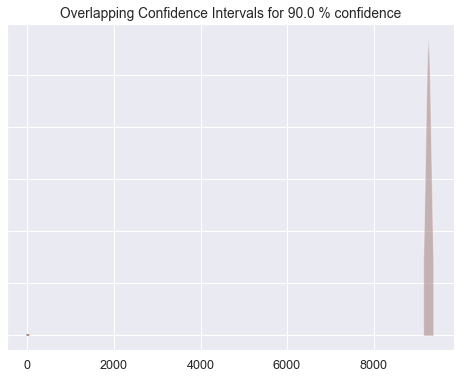

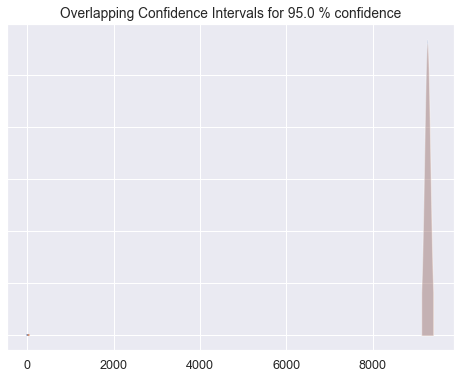

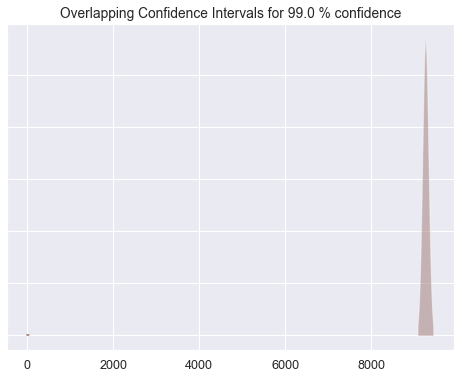

In [198]:
mu_m = 9261
mu_u = 9265
sd_m = 70
sd_u = 71

for i in [0.9, 0.95, 0.99]:
    
    ci1 = stats.norm.interval(i, loc=mu_m, scale=sd_m)
    ci2 = stats.norm.interval(i, loc=mu_u, scale=sd_u)

    def returnNormalY(x, mu, sd):
        return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

    # Generate Data for Plot
    # Fill Section
    x1 = np.linspace(ci1[0], ci1[1], 1000)
    y1 = returnNormalY(x1, mu_m, sd_m)
    x2 = np.linspace(ci2[0], ci2[1], 1000)
    y2 = returnNormalY(x2, mu_u, sd_u)
    # Line Section
    x1_line = np.linspace(0, 17)
    y1_line = returnNormalY(x1_line, mu_m, sd_m)
    x2_line = np.linspace(9, 25)
    y2_line = returnNormalY(x2_line, mu_u, sd_u)

    # Generate Plot
    fig, ax = plt.subplots()
    ax.plot(x1_line, y1_line)
    ax.plot(x2_line, y2_line)
    ax.fill_between(x1, y1, alpha=0.3)
    ax.fill_between(x2, y2, alpha=0.3)

    # Plot Editing
    fig.set_size_inches(8, 6, forward=False)
    ax.set_yticklabels([])
    plt.title(f"Overlapping Confidence Intervals for {i *100} % confidence")
    plt.show()

# Observations

1.Overlapping is seen in Marital Status in all Confidence Intervals.
2.Both Married and UnMarried Cutomers purchased similar items in sale.
3.management need not focus more on individual category because overlapping is Observed.

# Confidence intervals and distribution of the mean of the expenses by Different Age customers

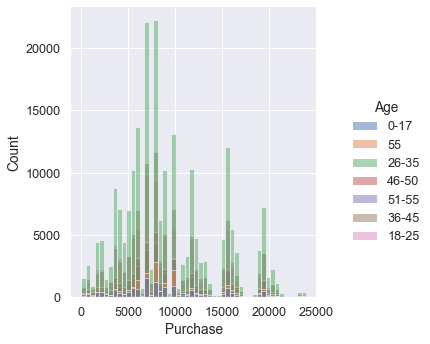

In [201]:
sns.displot(data = df, x = 'Purchase', hue = 'Age',bins = 50)
plt.show()

In [203]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [213]:
df_sample_A = df[df['Age'] == '0-17']
df_sample_purchase_A = df_sample_A['Purchase']
len(df_sample_purchase_A)

15102

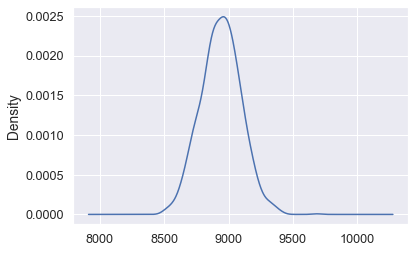

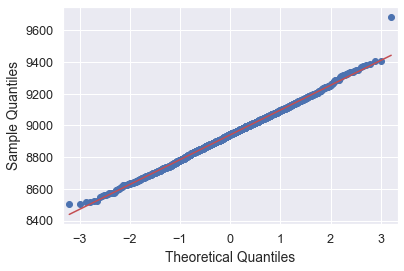

In [215]:
x = simulate_clt(df_sample_purchase_A, sample_size=1000, trials=1500)
sm.qqplot(x, dist=stats.norm, line='s');

In [216]:
df_sample_A1 = df[df['Age'] == '26-35']
df_sample_purchase_A1 = df_sample_A1['Purchase']
len(df_sample_purchase_A1)

219587

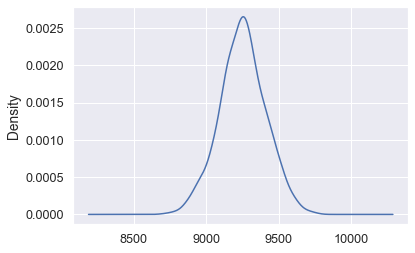

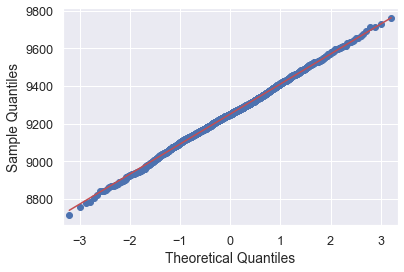

In [217]:
x = simulate_clt(df_sample_purchase_A1, sample_size=1000, trials=1500)
sm.qqplot(x, dist=stats.norm, line='s');

In [218]:
df_sample_A2 = df[df['Age'] == '18-25']
df_sample_purchase_A2 = df_sample_A2['Purchase']
len(df_sample_purchase_A2)

99660

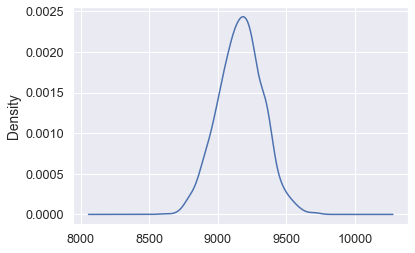

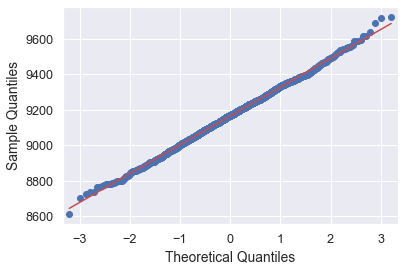

In [219]:
x = simulate_clt(df_sample_purchase_A2, sample_size=1000, trials=1500)
sm.qqplot(x, dist=stats.norm, line='s');

In [220]:
df_sample_A3 = df[df['Age'] == '36-45']
df_sample_purchase_A3 = df_sample_A3['Purchase']
len(df_sample_purchase_A3)

110013

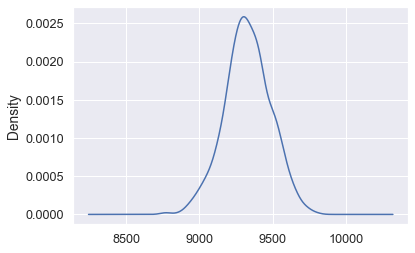

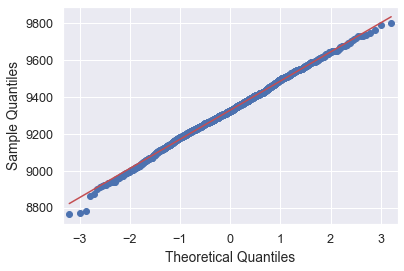

In [221]:
x = simulate_clt(df_sample_purchase_A3, sample_size=1000, trials=1500)
sm.qqplot(x, dist=stats.norm, line='s');

In [222]:
df_sample_A4 = df[df['Age'] == '46-50']
df_sample_purchase_A4 = df_sample_A4['Purchase']
len(df_sample_purchase_A4)

45701

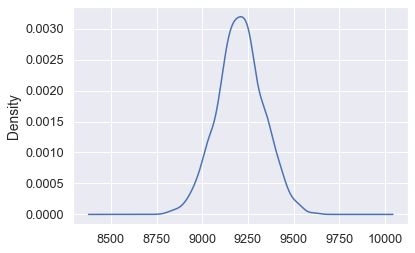

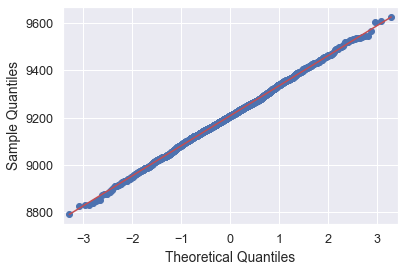

In [225]:
x = simulate_clt(df_sample_purchase_A4, sample_size=1500, trials=2000)
sm.qqplot(x, dist=stats.norm, line='s');

In [226]:
df_sample_A5 = df[df['Age'] == '51-55']
df_sample_purchase_A5 = df_sample_A5['Purchase']
len(df_sample_purchase_A5)

38501

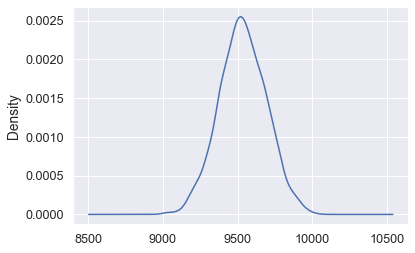

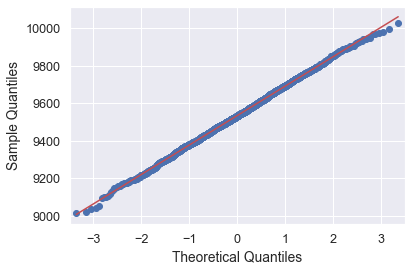

In [228]:
x = simulate_clt(df_sample_purchase_A5, sample_size=1000, trials=2500)
sm.qqplot(x, dist=stats.norm, line='s');

In [229]:
df_sample_A6 = df[df['Age'] == '55']
df_sample_purchase_A6 = df_sample_A5['Purchase']
len(df_sample_purchase_A6)

38501

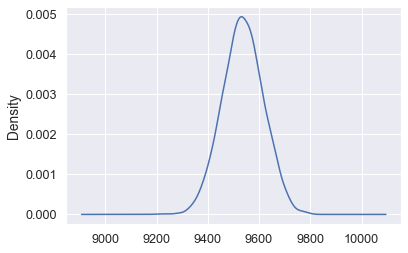

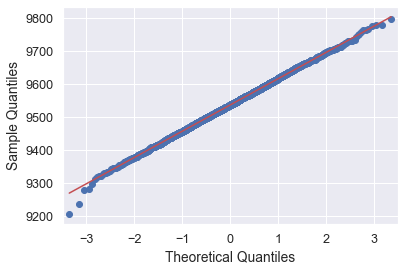

In [233]:
x = simulate_clt(df_sample_purchase_A6, sample_size=3500, trials=2500)
sm.qqplot(x, dist=stats.norm, line='s');

In [209]:
age_dict = {}
for i in df['Age'].unique():
    x = "purchase_mean"+i
    age_dict[x] = [df[df['Age'] == i]['Purchase'].sample(200).mean() for j in range(1000)]


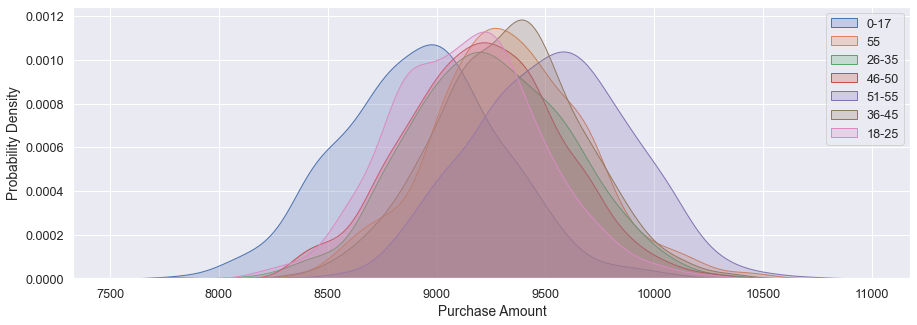

In [210]:
plt.figure(figsize = (15,5))
for i in age_dict.keys():
    x = i.strip('purchase_mean')
    sns.kdeplot(age_dict[i], shade = True, label = x)
plt.legend()
plt.xlabel('Purchase Amount')
plt.ylabel('Probability Density')
plt.show()

# Observations

1.Spending by Age_group 0-17 is low compared to other age groups.
2.Customers in Age_group 51-55 spend the most in the sale.

# Conclusion(Important Observations)

1.As we can see from boxplots of Gender, Age and Marital Status vs Purchase, the outliers even if they are present, they     are not having any significant effect. Hence doing the analysis by keeping them.
2.There are no null values found in the dataset.
3.There are few outliers for Product Category and Purchase.
4.For purchase, the distribution is clearly not a normal distribution. So with the help of CLT we need to plot a             distribution of sampling means in order to draw some insights.
5.As we can clearly see that, there are more no. of males purchasing than females.
6.As we can clearly see that, the customers in age group of 25-35 years are purchasing the most,whereas, the age range 0-17   purchased less.
7.As we can clearly see that, the customers of city of category 'B' are purchasing the most, whereas the people from City     category A are least interested in purchasing from Black Friday Sales.
8.Both Male and Female population from Category C cities are purchasing the most. 
9.It is clearly visible that 35% population is prefer to stay in a city for almost 1 year.
10.Most purchase done is from the age group of 26-35 and unmarried , wherease least is done from unmarried with 55+ age.
11.As we can see, plot is not normal distribution and hence applying CLT to get the sampling distribution of sample means      to get a Normal Distribution out of it.
12.As sample size increases, Standard error (standard deviation of sampling distribution of sampling means) decreases.
13.As the confidence percentage inreases,the difference between the upper limit and lower limit also increases.
14.There's no spending behavioral chnage in married and unmarried people
15.Overlapping is evident for married and unmarried cutomers. and not evident in male and Female.

# Recommendations

1.Females spend less than males on average, management needs to focus on some specific needs related to Females. Adding       some additional offers for women can increase their spending on Black Friday.
2.The management should have some offers on kids (0-17 years) in order to increase sales.
3.Management should focus on some games during the sale so that they can attract the age group of (0-17) years.
4.Management should focus on age group of 55+ so that management can make profits more as their purchase capacity is more.
5.More purchase capacity is for city tier C, management should focus on tier A and tier B , as more products worth less are   being purchased in tier B,so make some offers and tie ups in tier A as well to increase Profits.
